# Data Preparation

###Library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url_riasec= ("https://docs.google.com/spreadsheets/d/1GVrSG4uumrMgWp_ybXQeD3OZn3FWkD7R/export?format=csv")
riasec_df = pd.read_csv(url_riasec)
riasec_df.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,Date,Domain Source
0,11-1011.00,Chief Executives,1.B.1.a,Realistic,OI,Occupational Interests,1.30,11/2023,Machine Learning
1,11-1011.00,Chief Executives,1.B.1.b,Investigative,OI,Occupational Interests,3.24,11/2023,Machine Learning
2,11-1011.00,Chief Executives,1.B.1.c,Artistic,OI,Occupational Interests,2.08,11/2023,Machine Learning
3,11-1011.00,Chief Executives,1.B.1.d,Social,OI,Occupational Interests,3.52,11/2023,Machine Learning
4,11-1011.00,Chief Executives,1.B.1.e,Enterprising,OI,Occupational Interests,6.88,11/2023,Machine Learning


Penjelasan setiap kolom
- O*NET-SOC Code	: Kode unik untuk setiap pekerjaan berdasarkan O*NET (misal: 15-1121.00 untuk "Software Developer"). Ini penting untuk join dengan data pekerjaan lainnya.

- Title	: Nama atau judul dari pekerjaan tersebut (misal: "Software Developers, Applications").

- Element ID	: Kode ID unik untuk elemen tertentu dari pekerjaan, misalnya untuk minat, kemampuan, atau nilai tertentu.

- Element Name	: Nama dari elemen yang sedang dijelaskan, contoh: "Artistic", "Investigative", "Realistic", dsb. Ini adalah bagian dari RIASEC.

- Scale ID	: Kode skala yang digunakan, biasanya menentukan jenis data yang ditampilkan. Contoh: IM (Interest Measure).

- Scale Name	Nama skala, seperti "Importance", "Level", atau lainnya – menjelaskan jenis pengukuran nilai dari elemen tersebut.

- Data Value :	Nilai dari elemen yang diukur, misalnya: seberapa penting Artistic bagi pekerjaan itu, dalam skala tertentu (biasanya 0–100).

- Date	Tanggal data terakhir diperbarui. Bisa digunakan untuk cek keaktualan data.

- Domain Source	Sumber domain data – kadang menyebutkan apakah data ini berasal dari survei incumbent, expert rating, dsb.

In [ ]:
url_occupation = "https://drive.google.com/uc?export=download&id=12KY3rw8iyZWhJ-vNErGOKmLGaNhOvkrt"
occupation_df = pd.read_csv(url_occupation)
occupation_df.head()

,Code,Occupation,Job Family
0,13-2011.00,Accountants and Auditors \nBright Outlook,Business and Financial Operations
1,27-2011.00,Actors,"Arts, Design, Entertainment, Sports, and Media"
2,15-2011.00,Actuaries,Computer and Mathematical
3,29-1291.00,Acupuncturists,Healthcare Practitioners and Technical
4,29-1141.01,Acute Care Nurses,Healthcare Practitioners and Technical


Filter dataset riasec hanya menyisakan kolom yang akan digunakan yauti kolom
- O*NET-SOC Code
- Title
- Element Name
- Data Value

In [ ]:
riasec_df = riasec_df [['O*NET-SOC Code', 'Title', 'Element Name', 'Data Value']]
riasec_df

,O*NET-SOC Code,Title,Element Name,Data Value
0,11-1011.00,Chief Executives,Realistic,1.30
1,11-1011.00,Chief Executives,Investigative,3.24
2,11-1011.00,Chief Executives,Artistic,2.08
3,11-1011.00,Chief Executives,Social,3.52
4,11-1011.00,Chief Executives,Enterprising,6.88
...,...,...,...,...
8302,53-7121.00,"Tank Car, Truck, and Ship Loaders",Enterprising,1.31
8303,53-7121.00,"Tank Car, Truck, and Ship Loaders",Conventional,4.68
8304,53-7121.00,"Tank Car, Truck, and Ship Loaders",First Interest High-Point,1.00
8305,53-7121.00,"Tank Car, Truck, and Ship Loaders",Second Interest High-Point,6.00


menghapus data duplikat untuk data riasec dan menghapus missing value pada kolom

In [ ]:
riasec_df.drop_duplicates(inplace=True)
riasec_df.dropna(subset=['O*NET-SOC Code', 'Title', 'Element Name', 'Data Value'], inplace=True)

In [ ]:
riasec_df['Element Name'].unique()

array(['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising',
       'Conventional', 'First Interest High-Point',
       'Second Interest High-Point', 'Third Interest High-Point'],
      dtype=object)

Filter data untuk 6 tipe utama riasec, yaitu :
- Realistic
- Investigative
- Artistic
- Social
- Enterprising
- Conventional

In [ ]:
valid_riasec = valid_riasec = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']
riasec_df = riasec_df[riasec_df['Element Name'].isin(valid_riasec)]
riasec_df

,O*NET-SOC Code,Title,Element Name,Data Value
0,11-1011.00,Chief Executives,Realistic,1.30
1,11-1011.00,Chief Executives,Investigative,3.24
2,11-1011.00,Chief Executives,Artistic,2.08
3,11-1011.00,Chief Executives,Social,3.52
4,11-1011.00,Chief Executives,Enterprising,6.88
...,...,...,...,...
8299,53-7121.00,"Tank Car, Truck, and Ship Loaders",Investigative,1.94
8300,53-7121.00,"Tank Car, Truck, and Ship Loaders",Artistic,1.00
8301,53-7121.00,"Tank Car, Truck, and Ship Loaders",Social,1.00
8302,53-7121.00,"Tank Car, Truck, and Ship Loaders",Enterprising,1.31


**Pivot data RIASEC**

mengubah data dari format long(baris per elemen RIASEC) ke format wide(kolom per elemen RIASEC), sehingga setiap pekerjaan mempunyai 6 kolom RIASEc

**Tujuan**

Pivot ini menyusun ulang data agar setiap pekerjaan memiliki 6 skor RIASEC sebagai kolom, memudahkan analisis, visualisasi, dan perhitungan jarak untuk sistem rekomendasi.

In [ ]:
#Pivot data riasec
df_pivot = riasec_df.pivot_table(
    index=['O*NET-SOC Code', 'Title'],
    columns='Element Name',
    values='Data Value'
).reset_index()
df_pivot

Element Name,O*NET-SOC Code,Title,Artistic,Conventional,Enterprising,Investigative,Realistic,Social
0,11-1011.00,Chief Executives,2.08,5.00,6.88,3.24,1.30,3.52
1,11-1011.03,Chief Sustainability Officers,2.48,4.49,6.68,4.78,2.04,3.55
2,11-1021.00,General and Operations Managers,1.31,5.32,6.96,2.39,2.22,3.37
3,11-1031.00,Legislators,2.70,3.62,5.52,3.35,1.54,3.69
4,11-2011.00,Advertising and Promotions Managers,3.85,4.30,7.00,1.71,1.07,3.14
...,...,...,...,...,...,...,...,...
918,53-7071.00,Gas Compressor and Gas Pumping Station Operators,1.00,4.85,1.52,2.33,6.14,1.54
919,53-7072.00,"Pump Operators, Except Wellhead Pumpers",1.00,4.51,1.46,2.26,6.67,1.28
920,53-7073.00,Wellhead Pumpers,1.00,4.36,1.87,2.41,6.77,1.07
921,53-7081.00,Refuse and Recyclable Material Collectors,1.00,4.41,1.55,1.77,7.00,1.39


In [ ]:
#Merge data riasec dan data occupation
df_pivot = df_pivot.merge(occupation_df, left_on='O*NET-SOC Code', right_on='Code', how='left')
df_pivot

,O*NET-SOC Code,Title,Artistic,Conventional,Enterprising,Investigative,Realistic,Social,Code,Occupation,Job Family
0,11-1011.00,Chief Executives,2.08,5.00,6.88,3.24,1.30,3.52,11-1011.00,Chief Executives,Management
1,11-1011.03,Chief Sustainability Officers,2.48,4.49,6.68,4.78,2.04,3.55,11-1011.03,Chief Sustainability Officers,Management
2,11-1021.00,General and Operations Managers,1.31,5.32,6.96,2.39,2.22,3.37,11-1021.00,General and Operations Managers,Management
3,11-1031.00,Legislators,2.70,3.62,5.52,3.35,1.54,3.69,11-1031.00,Legislators,Management
4,11-2011.00,Advertising and Promotions Managers,3.85,4.30,7.00,1.71,1.07,3.14,11-2011.00,Advertising and Promotions Managers,Management
...,...,...,...,...,...,...,...,...,...,...,...
918,53-7071.00,Gas Compressor and Gas Pumping Station Operators,1.00,4.85,1.52,2.33,6.14,1.54,53-7071.00,Gas Compressor and Gas Pumping Station Operators,Transportation and Material Moving
919,53-7072.00,"Pump Operators, Except Wellhead Pumpers",1.00,4.51,1.46,2.26,6.67,1.28,53-7072.00,"Pump Operators, Except Wellhead Pumpers",Transportation and Material Moving
920,53-7073.00,Wellhead Pumpers,1.00,4.36,1.87,2.41,6.77,1.07,53-7073.00,Wellhead Pumpers,Transportation and Material Moving
921,53-7081.00,Refuse and Recyclable Material Collectors,1.00,4.41,1.55,1.77,7.00,1.39,53-7081.00,Refuse and Recyclable Material Collectors,Transportation and Material Moving


In [ ]:
print(df_pivot.isnull().sum())
print(df_pivot[['Occupation', 'Job Family']].isnull().sum())

O*NET-SOC Code    0
Title             0
Artistic          0
Conventional      0
Enterprising      0
Investigative     0
Realistic         0
Social            0
Code              0
Occupation        0
Job Family        0
Top_RIASEC        0
dtype: int64
Occupation    0
Job Family    0
dtype: int64


In [ ]:
# Validasi hasil merge
missing_merge = df_pivot[['Occupation', 'Job Family']].isnull().sum()
print("Missing values setelah merge:\n", missing_merge)

Missing values setelah merge:
 Occupation    0
Job Family    0
dtype: int64


# EDA

In [ ]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   O*NET-SOC Code  923 non-null    object 
 1   Title           923 non-null    object 
 2   Artistic        923 non-null    float64
 3   Conventional    923 non-null    float64
 4   Enterprising    923 non-null    float64
 5   Investigative   923 non-null    float64
 6   Realistic       923 non-null    float64
 7   Social          923 non-null    float64
 8   Code            923 non-null    object 
 9   Occupation      923 non-null    object 
 10  Job Family      923 non-null    object 
dtypes: float64(6), object(5)
memory usage: 79.4+ KB


In [ ]:
df_pivot[['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']].describe()

,Realistic,Investigative,Artistic,Social,Enterprising,Conventional
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,4.578028,3.365515,1.933239,2.938927,2.820098,4.531820
std,1.924689,1.685251,1.208703,1.743803,1.608613,0.998796
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.660000
25%,2.910000,2.020000,1.000000,1.500000,1.550000,3.730000
50%,4.850000,2.960000,1.490000,2.460000,2.350000,4.440000
75%,6.395000,4.760000,2.340000,3.855000,3.770000,5.175000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


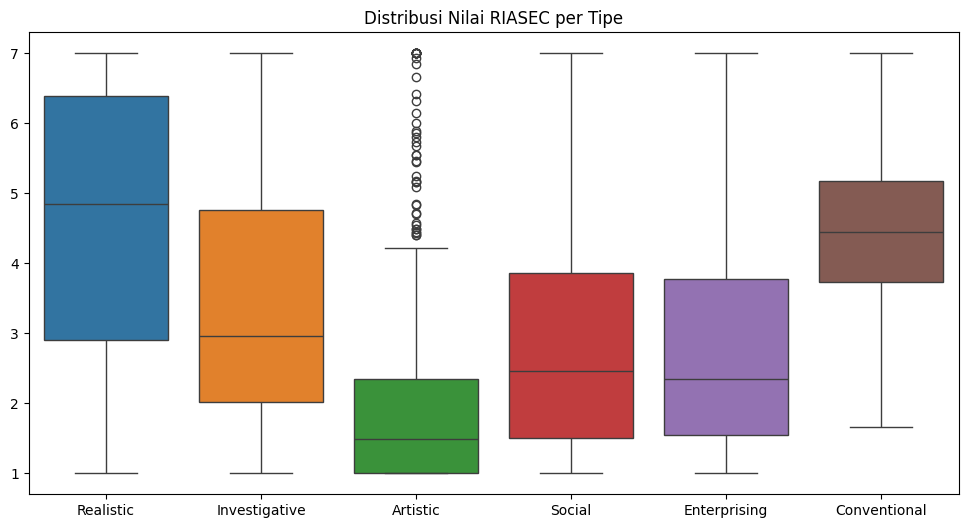

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_pivot[['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']])
plt.title('Distribusi Nilai RIASEC per Tipe')
plt.show()


Interpretasi Boxplot Nilai RIASEC
1. Realistic
- Median tinggi (sekitar 4.9) → banyak pekerjaan menekankan aspek realistis (praktis, fisik, teknis).
- Distribusi lebar → nilai tersebar merata dari 1 sampai 7.
- Tidak banyak outlier → penyebaran cukup alami.

2. Investigative
- Median sedang (3.0) → tidak seumum Realistic, tapi tetap signifikan.
- Distribusi cukup lebar → pekerjaan dengan fokus analitis bervariasi.
- Beberapa outlier kecil → pekerjaan dengan nilai investigatif sangat tinggi relatif jarang.

3. Artistic
- Median rendah (sekitar 1.5) → mayoritas pekerjaan tidak memerlukan kreativitas tinggi.
- Banyak outlier di atas (5–7) → ada sebagian kecil pekerjaan yang sangat artistik (desain, seni, kreatif).
- Distribusi miring ke kiri (skewed) → skewness positif.

4. Social
- Median agak rendah (2.5) → sebagian besar pekerjaan tidak sangat sosial.
- Tapi distribusinya cukup luas, artinya tetap banyak pekerjaan sosial (pendidikan, kesehatan).
- Ada nilai tinggi (hingga 7) → tapi minoritas.

5. Enterprising
- Mirip Social, dengan median rendah (2.4) dan sebaran lebar.
- Ada pekerjaan yang sangat menuntut kemampuan persuasi, kepemimpinan, wirausaha (nilai tinggi), tapi mayoritas tidak.

6. Conventional
- Median tinggi (sekitar 4.5) → banyak pekerjaan menuntut struktur, keteraturan, administrasi.
- Distribusi rapat dan simetris → cenderung stabil dan konsisten antar pekerjaan.
- Hampir tidak ada outlier.



<ipython-input-34-4e5d9bb53043>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_jobs, x=riasec, y='Title', palette='coolwarm')


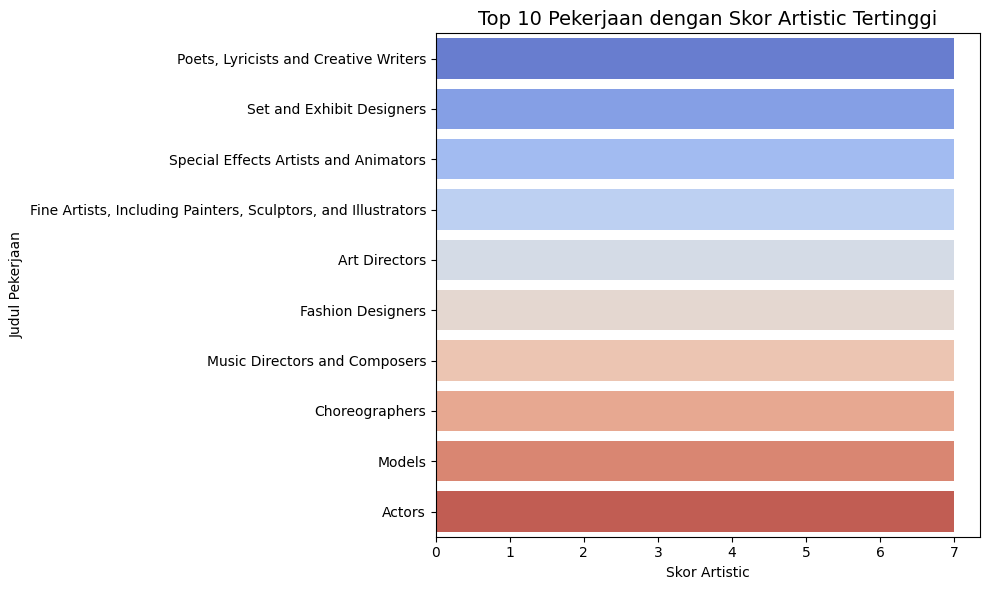

<ipython-input-34-4e5d9bb53043>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_jobs, x=riasec, y='Title', palette='coolwarm')


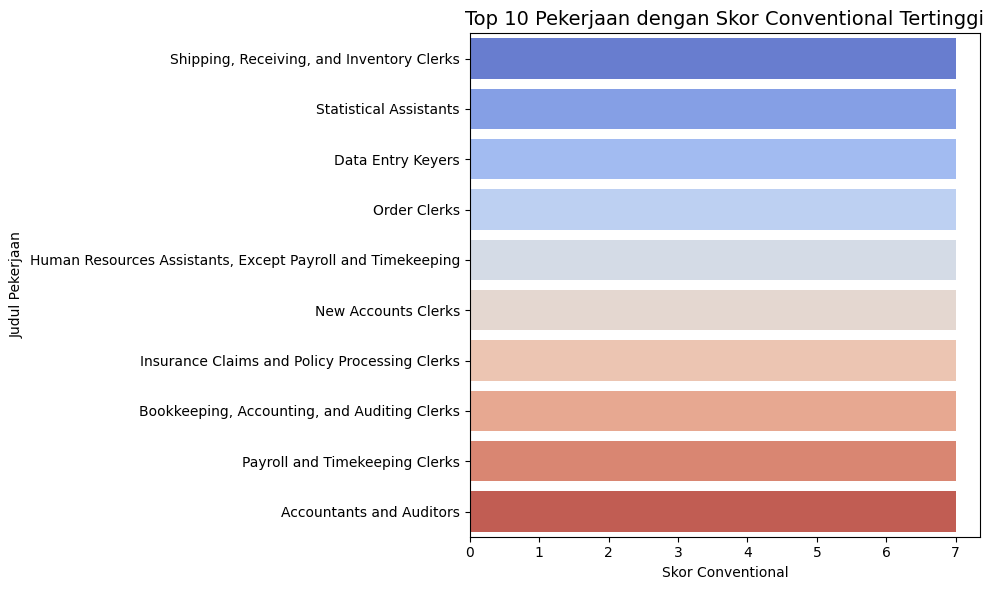

<ipython-input-34-4e5d9bb53043>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_jobs, x=riasec, y='Title', palette='coolwarm')


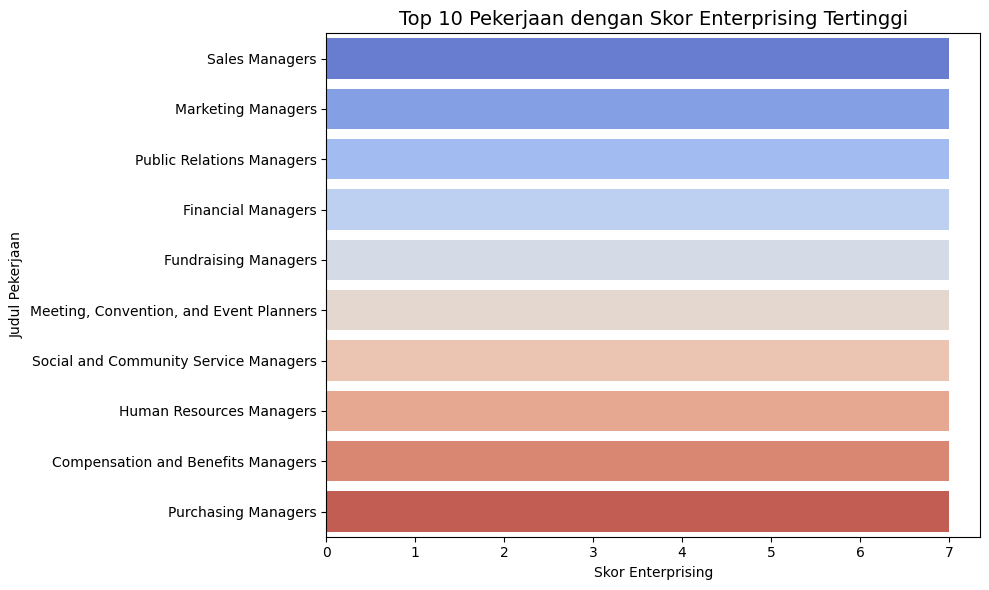

<ipython-input-34-4e5d9bb53043>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_jobs, x=riasec, y='Title', palette='coolwarm')


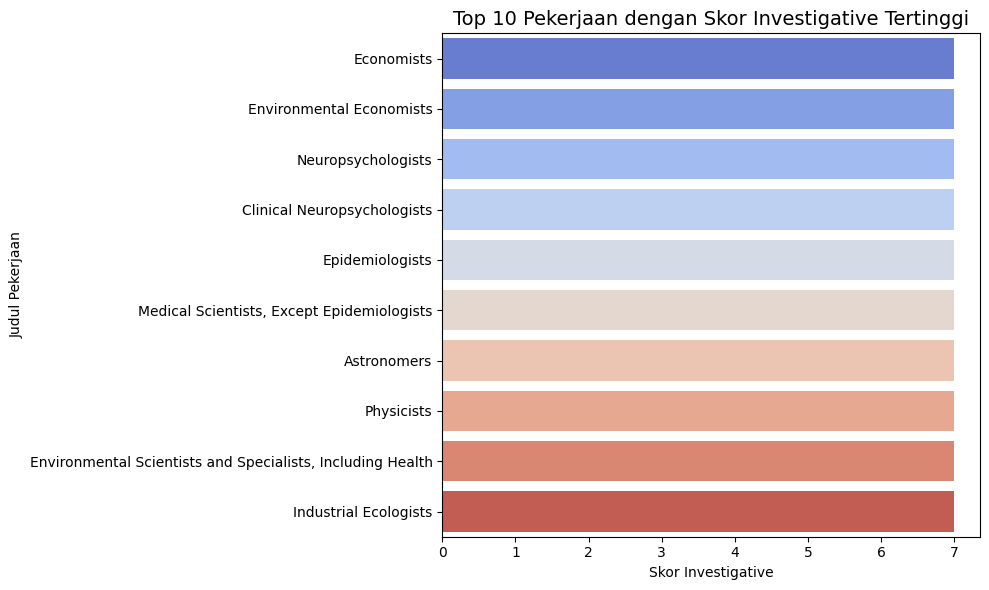

<ipython-input-34-4e5d9bb53043>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_jobs, x=riasec, y='Title', palette='coolwarm')


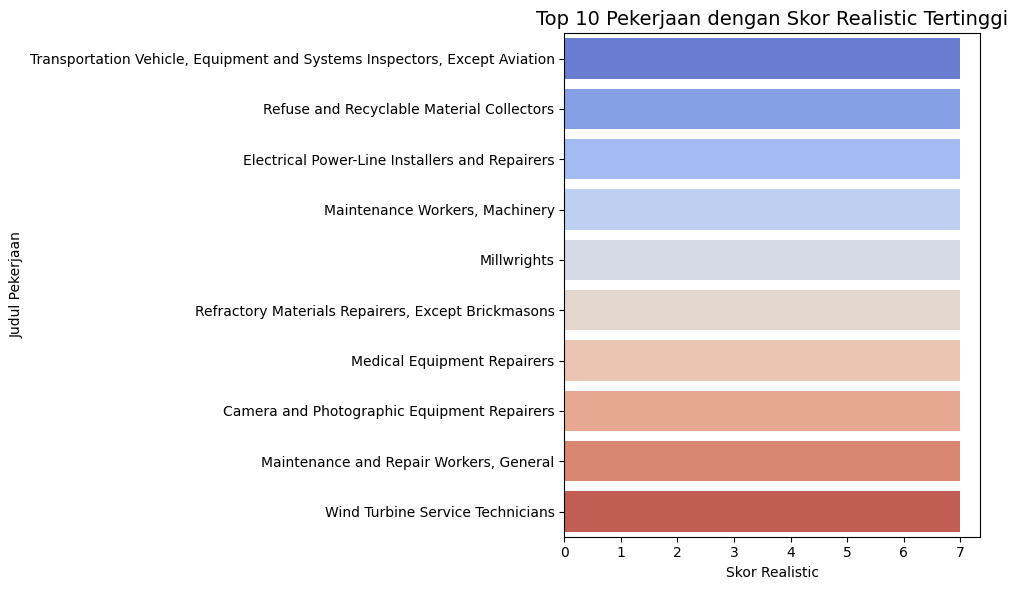

<ipython-input-34-4e5d9bb53043>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_jobs, x=riasec, y='Title', palette='coolwarm')


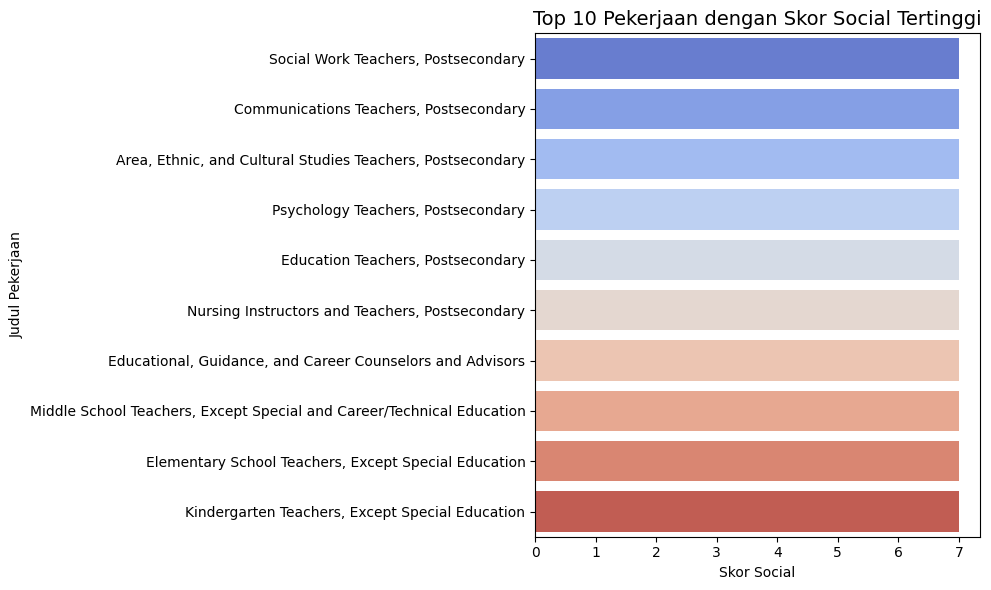

In [ ]:
# viasulaisai 10 pekerjaan teratas berdasarkan skor tipe RIASEC

riasec_types = ['Artistic', 'Conventional', 'Enterprising', 'Investigative', 'Realistic', 'Social']
for riasec in riasec_types:
    top_jobs = df_pivot[['Title', riasec]].sort_values(by=riasec, ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_jobs, x=riasec, y='Title', palette='coolwarm')
    plt.title(f'Top 10 Pekerjaan dengan Skor {riasec} Tertinggi', fontsize=14)
    plt.xlabel(f'Skor {riasec}')
    plt.ylabel('Judul Pekerjaan')
    plt.tight_layout()
    plt.show()

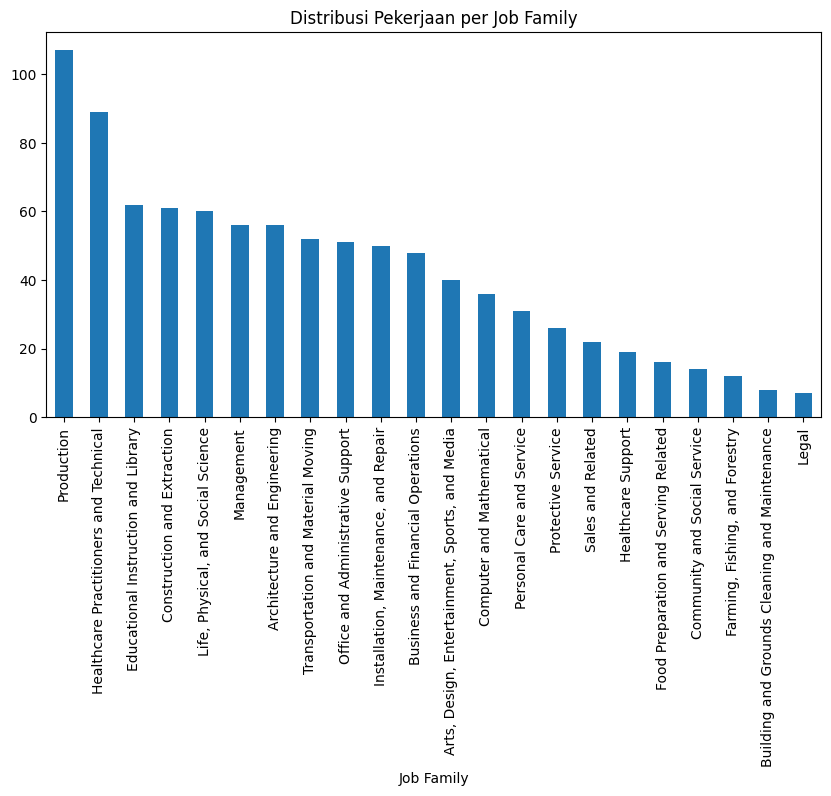

In [ ]:
#Distribusi job family

plt.figure(figsize=(10, 5))
df_pivot['Job Family'].value_counts().plot(kind='bar')
plt.title('Distribusi Pekerjaan per Job Family')
plt.xticks(rotation=90)
plt.show()

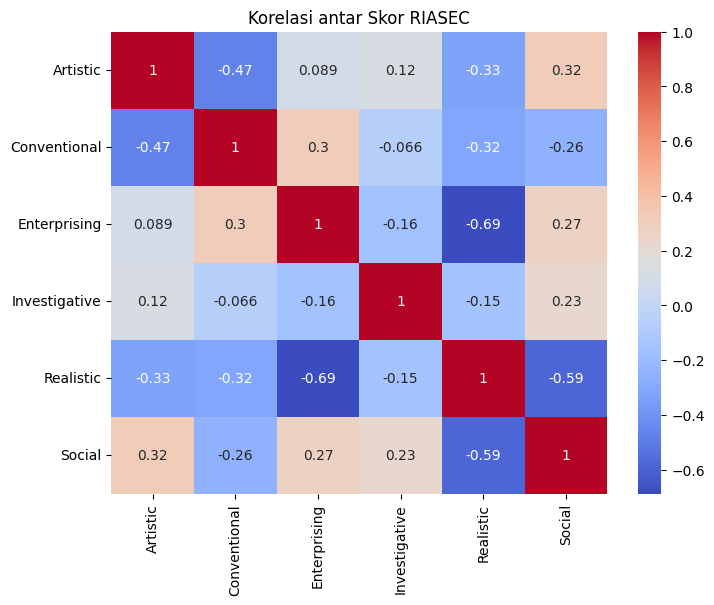

In [ ]:
# Heatmap Korelasi RIASEC
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot[riasec_types].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Skor RIASEC')
plt.show()

Interpretasi Hasil Heatmap Korelasi:
1. Korelasi Positif (warna merah):
- Artistic – Social: 0.32 → Pekerjaan yang tinggi pada "Artistic" cenderung juga tinggi pada "Social".
- Enterprising – Conventional: 0.30 → Pekerjaan yang bersifat memimpin juga cenderung punya struktur dan organisasi yang baik.
- Investigative – Social: 0.23 → Ada hubungan lemah positif antara analitis dan sosial.

2. Korelasi Negatif (warna biru):
- Realistic – Enterprising: -0.69 → Pekerjaan realistis (praktis/manual) sangat berbeda dari pekerjaan enterprising (memimpin/berbisnis).
- Realistic – Social: -0.59 → Pekerjaan realistis juga bertolak belakang dengan pekerjaan sosial.
- Artistic – Conventional: -0.47 → Pekerjaan kreatif sangat berbeda dari yang terstruktur dan rutin.



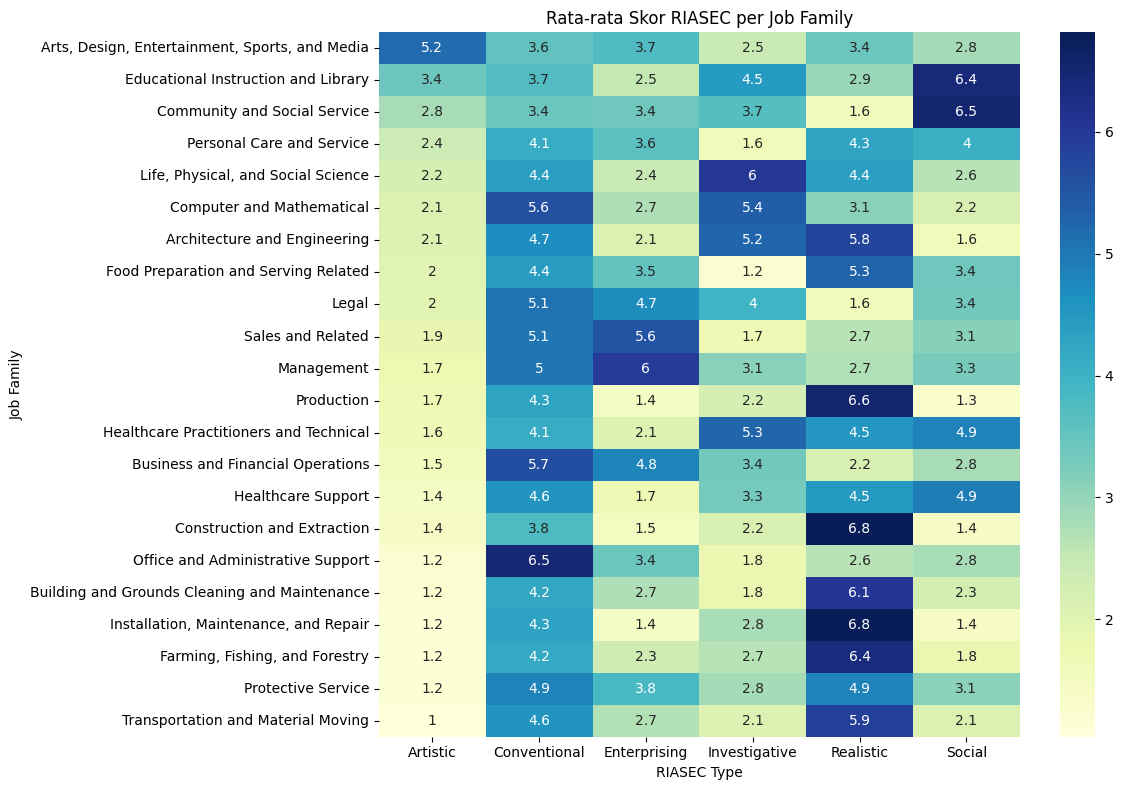

In [ ]:
# Rata-rata skor RIASEC per Family
riasec_means = df_pivot.groupby('Job Family')[riasec_types].mean().sort_values(by='Artistic', ascending=False)
plt.figure(figsize=(12, 8))
sns.heatmap(riasec_means, annot=True, cmap='YlGnBu')
plt.title('Rata-rata Skor RIASEC per Job Family')
plt.ylabel('Job Family')
plt.xlabel('RIASEC Type')
plt.tight_layout()
plt.show()


Interpretasi :
Jika seseorang memiliki skor tinggi di:
- Artistic → cocok di "Arts, Design, Entertainment".
- Investigative → cocok di "Life, Physical, and Social Science".
- Realistic → cocok di "Construction", "Installation", atau "Production".
- Social → cocok di "Community and Social Service" atau "Healthcare".